## Develop a hand gesture recognition model that can accurately identify and classify different hand gestures from image or video data, enabling intuitive human-computer interaction and gesture-based control systems.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0067.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0153.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0105.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0018.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0050.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0029.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0195.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0051.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0074.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0142.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0149.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0121.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0194.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0003.png
/kaggl

#### Loading Images and their labels in the variables 

In [10]:

from PIL import Image
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
# Set the path to the main folder containing 9 subfolders
main_folder = '/kaggle/input/leapgestrecog/leapGestRecog'

# Function to load and convert images to DataFrame
def images_to_dataframe(main_folder):
    data=[]
    label=[]

    # Loop through each subfolder
    for subfolder_name in os.listdir(main_folder):
        subfolder_path = os.path.join(main_folder, subfolder_name)
        
        for imagefolder_name in os.listdir(subfolder_path):
            imagefolder_path = os.path.join(subfolder_path, imagefolder_name)

            # Loop through each image in the subfolder
            for image_name in os.listdir(imagefolder_path):
                image_path = os.path.join(imagefolder_path, image_name)

                # Open and convert the image to a NumPy array
                image = Image.open(image_path)
                image=image.resize((200,200))
                image_array = np.array(image)
                

                # Add the image array and label to the data dictionary
                data.append(image_array)
                label.append(imagefolder_name)

    
    return data,label

# Convert images to DataFrame
data,label = images_to_dataframe(main_folder)




In [12]:
data=np.array(data)
print(data.shape) 

(20000, 200, 200)


In [17]:
data[0].shape 

(200, 200)

#### Visualizing the images 

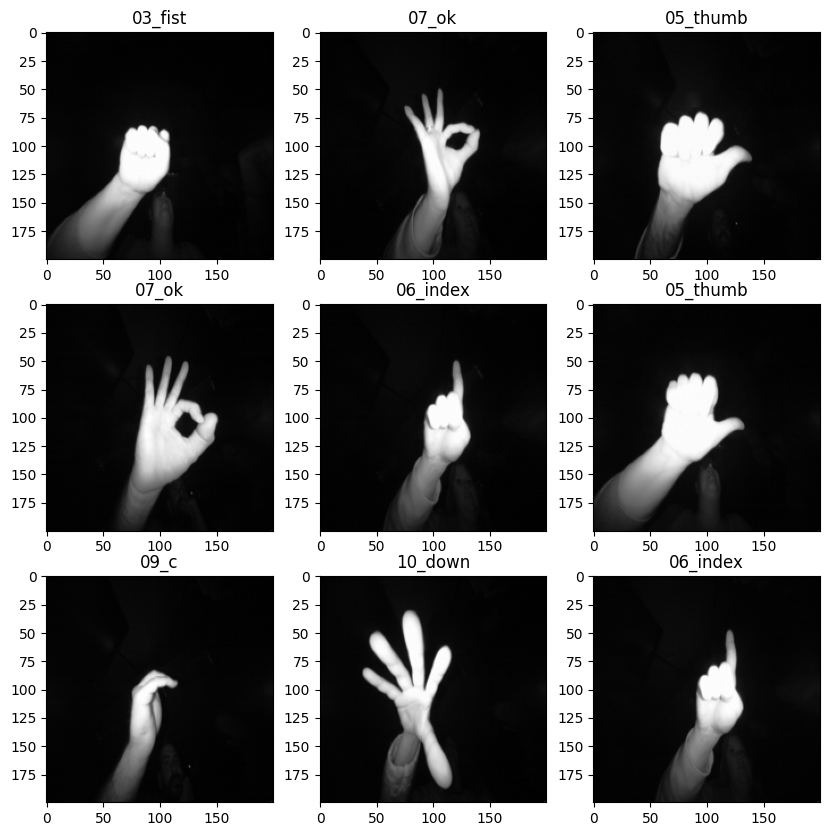

In [21]:
plt.figure(figsize=(10,10))
for i in range(1,10):
         x=np.random.randint(1,10000)
         plt.subplot(3,3,i)
         plt.imshow(data[x],cmap="gray")
         plt.title(label[x])


#### Integer Label Encoding 

In [22]:
print(len(label)) 
set(label) 


20000


{'01_palm',
 '02_l',
 '03_fist',
 '04_fist_moved',
 '05_thumb',
 '06_index',
 '07_ok',
 '08_palm_moved',
 '09_c',
 '10_down'}

In [23]:
label_dict={'01_palm':0,
 '02_l':1,
 '03_fist':2,
 '04_fist_moved':3,
 '05_thumb':4,
 '06_index':5,
 '07_ok':6,
 '08_palm_moved':7,
 '09_c':8,
 '10_down':9} 

label=list(map(label_dict.get,label))
set(label) 

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [24]:
print(type(label[0]))
label=np.array(label) 

<class 'int'>


#### Splitiing data into train and test 

In [31]:
from sklearn.model_selection import train_test_split
import tensorflow 
import keras 
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Input,MaxPooling2D,Flatten,BatchNormalization,Dropout 
from keras.callbacks import EarlyStopping 
import keras_tuner as k 

In [32]:
x_train,x_test,y_train,y_test=train_test_split(data,label,test_size=0.20,random_state=40)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(16000, 200, 200) (16000,)
(4000, 200, 200) (4000,)


In [33]:
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize the pixel values

x_train = x_train.reshape(16000, 200, 200, 1)
x_test = x_test.reshape(4000, 200, 200, 1)


In [34]:
print(x_train.shape,x_test.shape)

(16000, 200, 200, 1) (4000, 200, 200, 1)


#### Creating the CNN architecture 

In [35]:
model=Sequential() 
model.add(Input(shape=(200,200,1))) 

model.add(Conv2D(96,(11,11),strides=4,padding="valid",activation="relu"))
model.add(MaxPooling2D((3,3),strides=2))

model.add(Conv2D(256,(5,5),strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D((3,3),strides=2)) 

model.add(Conv2D(384,(3,3),strides=1,padding="same",activation="relu"))
model.add(Conv2D(384,(3,3),strides=1,padding="same",activation="relu"))
model.add(Conv2D(256,(3,3),strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D((3,3),strides=2))
model.add(Flatten())
model.add(Dense(4096,activation="relu"))
model.add(Dense(4096,activation="relu"))
model.add(Dense(10,activation="softmax")) 

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 48, 48, 96)        11712     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 23, 23, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 11, 11, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 384)       885120    
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 384)      

#### training the model 

In [37]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
history=model.fit(x_train,y_train,batch_size=500,epochs=8,validation_split=0.20)
history

Epoch 1/8
26/26 [==============================] - 30s 640ms/step - loss: 2.0929 - accuracy: 0.2496 - val_loss: 1.1425 - val_accuracy: 0.6119
Epoch 2/8
26/26 [==============================] - 8s 308ms/step - loss: 0.6290 - accuracy: 0.7865 - val_loss: 0.1485 - val_accuracy: 0.9597
Epoch 3/8
26/26 [==============================] - 8s 310ms/step - loss: 0.0642 - accuracy: 0.9789 - val_loss: 0.0490 - val_accuracy: 0.9762
Epoch 4/8
26/26 [==============================] - 8s 312ms/step - loss: 0.2696 - accuracy: 0.9236 - val_loss: 0.0267 - val_accuracy: 0.9937
Epoch 5/8
26/26 [==============================] - 8s 316ms/step - loss: 0.0180 - accuracy: 0.9947 - val_loss: 0.0041 - val_accuracy: 0.9994
Epoch 6/8
26/26 [==============================] - 8s 321ms/step - loss: 0.0087 - accuracy: 0.9979 - val_loss: 0.0073 - val_accuracy: 0.9972
Epoch 7/8
26/26 [==============================] - 8s 324ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 8/8
26

#### Visualizing the training history i.e train loss vs validation loss,train accuracy vs validation accuracy 

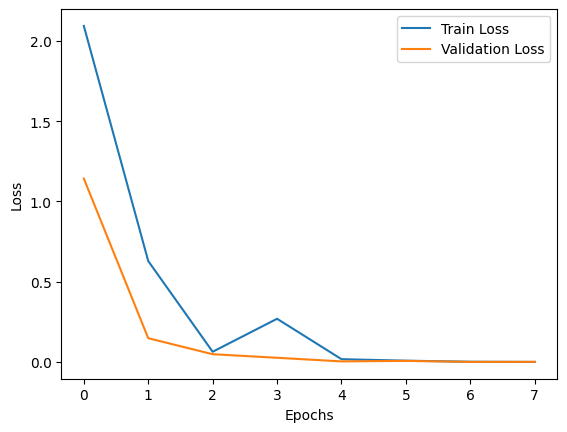

In [39]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

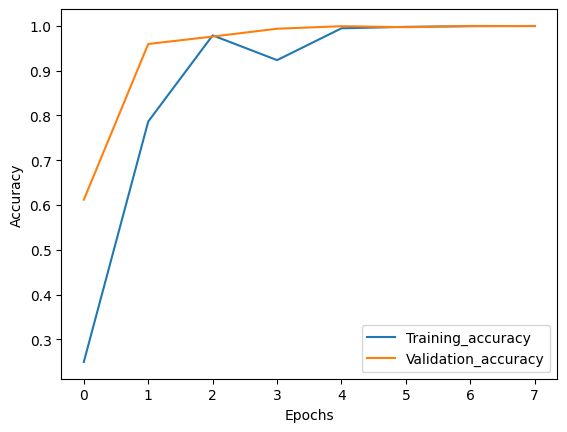

In [40]:
plt.plot(history.history['accuracy'], label='Training_accuracy')
plt.plot(history.history['val_accuracy'], label='Validation_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show() 

#### making predictions on  trained model

In [41]:
predicted=model.predict(x_test)
predicted 

125/125 [==============================] - 2s 8ms/step


array([[3.5512747e-14, 2.9802544e-05, 4.7483777e-11, ..., 1.5689246e-23,
        4.5962747e-23, 1.1048721e-20],
       [7.5976747e-10, 1.1435374e-12, 1.1677009e-08, ..., 1.8726891e-10,
        2.5702706e-05, 6.7500764e-07],
       [6.6975126e-08, 9.3540432e-11, 9.9996483e-01, ..., 8.2813625e-18,
        2.3330876e-10, 8.0719917e-07],
       ...,
       [3.5792840e-13, 3.7280715e-19, 1.1830316e-17, ..., 9.9999809e-01,
        3.0539015e-13, 6.1754181e-17],
       [1.6999394e-10, 1.0000000e+00, 1.0729143e-20, ..., 1.1851439e-31,
        0.0000000e+00, 2.5177382e-26],
       [1.2253077e-16, 2.1411889e-18, 1.5906069e-06, ..., 5.9026053e-14,
        1.4457664e-04, 1.8129296e-20]], dtype=float32)

In [42]:
predict=np.argmax(predicted,axis=1)
predict 

array([5, 6, 2, ..., 7, 1, 3])

#### Evaluation of the trained Model 

accuracy :  0.99875


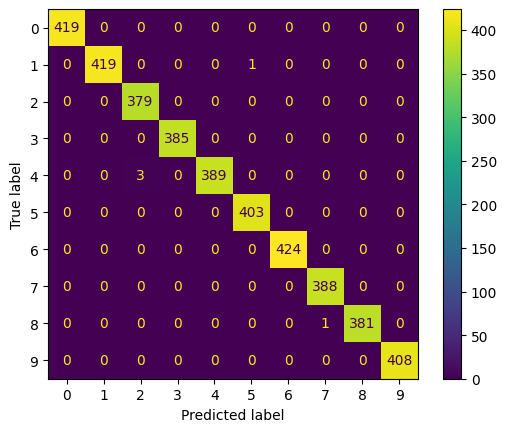

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay 
accuracy=accuracy_score(y_test,predict) 
print("accuracy : ",accuracy) 


cm=confusion_matrix(y_test,predict)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show() 

#### The CNN based model is able to classify 99.87% of hand gestures correctly  